# Self Orginizing Map

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
import cv2

In [2]:
def check_new(new):
    if new[0]>1:
        new[0]=1
    if new[0]<0:
        new[0]=0
    if new[1]>1:
        new[1]=1
    if new[1]<0:
        new[1]=0
    return new
        

In [3]:
def print_graph(nlist,slist):
    figure(figsize=(15, 8))
    X=[]
    Y=[]
#     num=[]
    for i in range(len(nlist)):
        X.append(nlist[i][0])
        Y.append(nlist[i][1])
#         num.append(i)
        plt.annotate(i,(nlist[i][0],nlist[i][1]))
        plt.plot(nlist[i][0],nlist[i][1],'*r')
    X.append(nlist[0][0])
    Y.append(nlist[0][1])
    Xp=[]
    Yp=[]
    for n in slist:
        Xp.append(n[0])
        Yp.append(n[1])
    plt.plot(Xp,Yp,'.')
    plt.plot(X,Y)
    plt.show()

In [4]:
def make_nlist():
    nueron_lst=[]
    xarr=np.arange(0,1,1/26)
    yarr=np.arange(0,1,1/24)

    for i in range(len(xarr)):
        nueron_lst.append(np.array([xarr[i] ,1]))
    for i in range(len(yarr)-1,-1,-1):
        nueron_lst.append(np.array([1 ,yarr[i]]))
    for i in range(len(xarr)-1,-1,-1):
        nueron_lst.append(np.array([xarr[i] ,0]))
    for i in range(len(yarr)):
        nueron_lst.append(np.array([0 ,yarr[i]]))
    return nueron_lst


In [5]:
def SOM(data):
    nueron_lst=make_nlist()
    ker=cv2.getGaussianKernel(51,-1)

    mid=25
    num=25
    alpha=0.1
    sampled_points=[]
    for i in range(25):
        print("iteration ",i )
        print_graph(nueron_lst,sampled_points)
        num-=1
        sampled_points=[]
        data=data.sample(frac=1)
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist=np.inf

            # find closest nueron
            for n in range(len(nueron_lst)):
                dist=np.sqrt((row[0]-nueron_lst[n][0])**2+(row[1]-nueron_lst[n][1])**2)
                if dist<small_dist:
                    small_dist=dist
                    spot=n
                    
            # update weights of nuerons
            new = nueron_lst[spot]+alpha*ker[mid]*(sampled_points[-1]-nueron_lst[spot])
            new=check_new(new)
            nueron_lst[spot]=new
            
           
            for j in range(1,num):
                new = nueron_lst[(spot+j)%len(nueron_lst)]+alpha*ker[mid+j]*(sampled_points[-1]-nueron_lst[(spot+j)%len(nueron_lst)])
                new=check_new(new)
                nueron_lst[(spot+j)%len(nueron_lst)]=new

    print("iteration ",i )
    print_graph(nueron_lst,sampled_points)


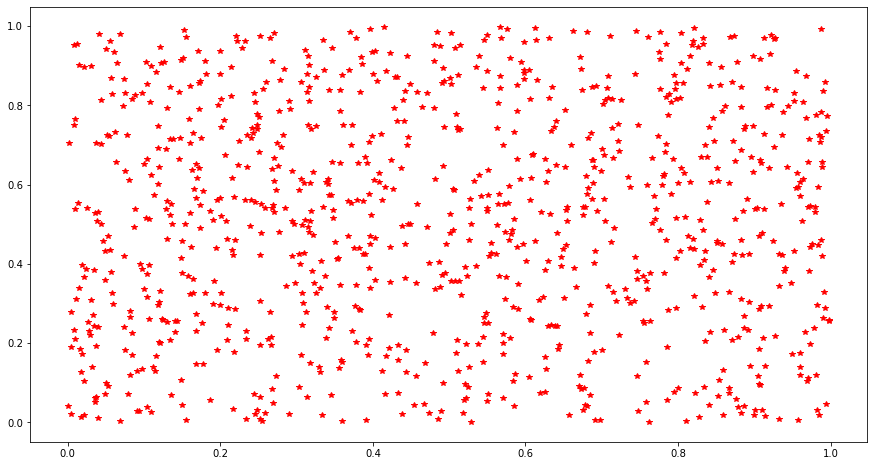

In [6]:
data5=pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data5[i] = [randX, randY]
data5=data5.T
X=[]
Y=[]
for index,row in data5.iterrows():
    X.append(row[0])
    Y.append(row[1])
figure(figsize=(15, 8))
# plt.plot(X,Y)
plt.plot(X,Y,"*r")
plt.show()

iteration  0


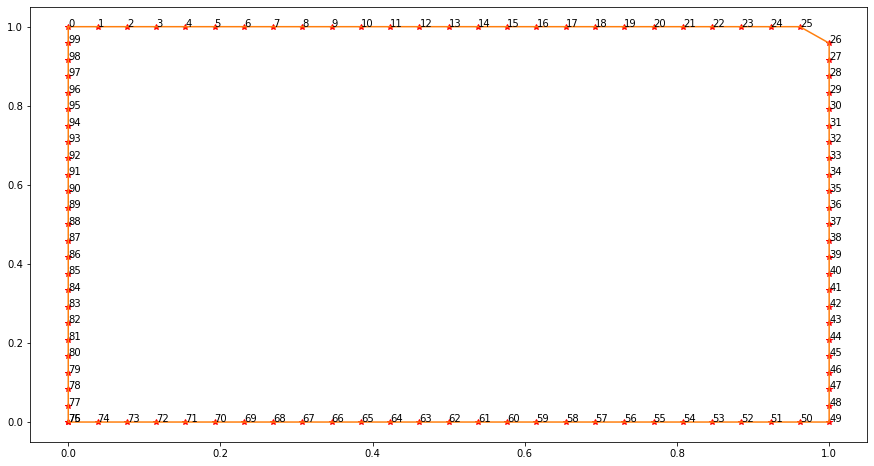

iteration  1


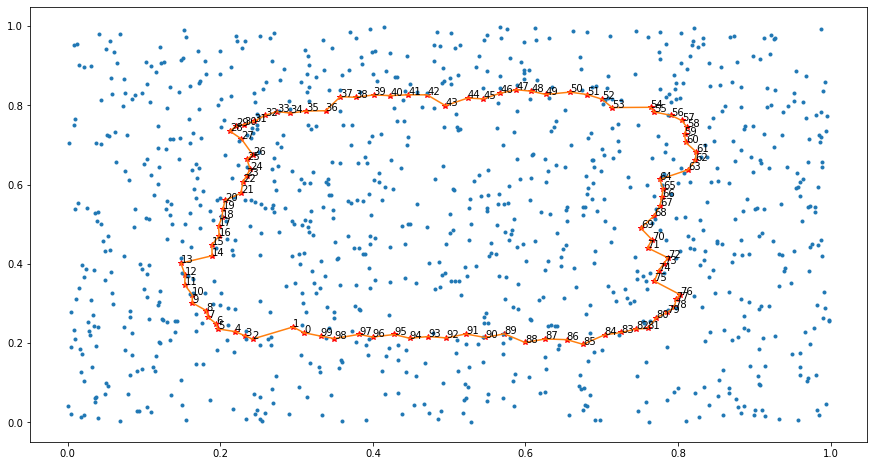

iteration  2


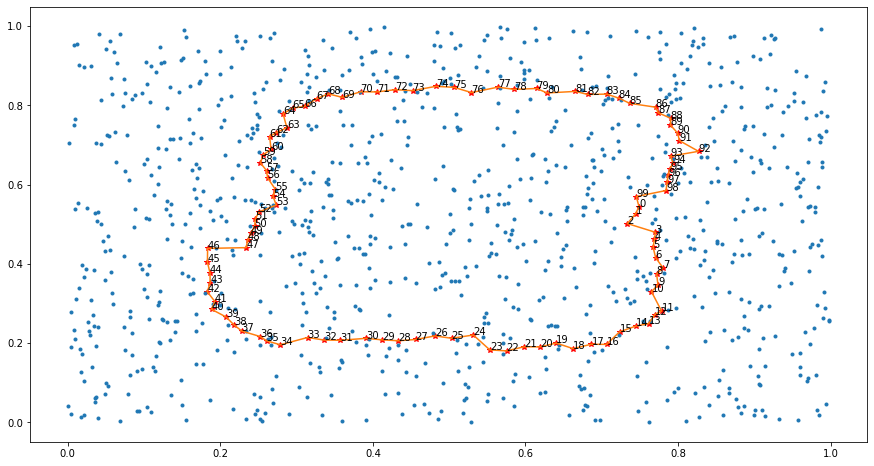

iteration  3


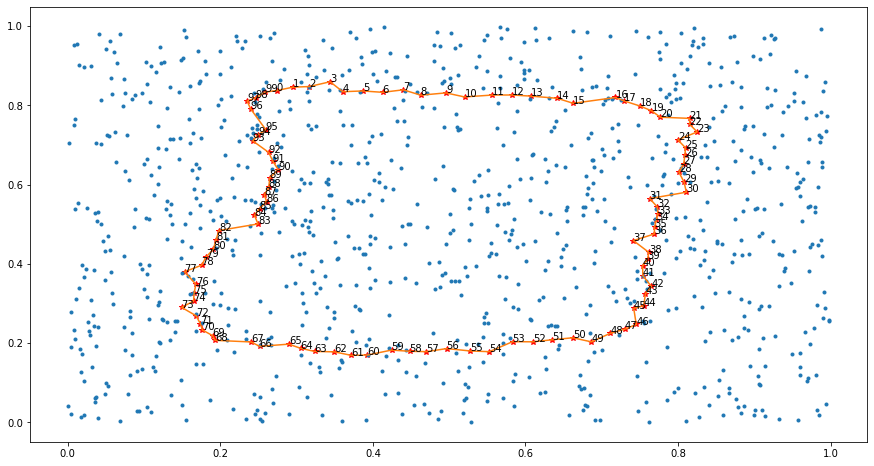

iteration  4


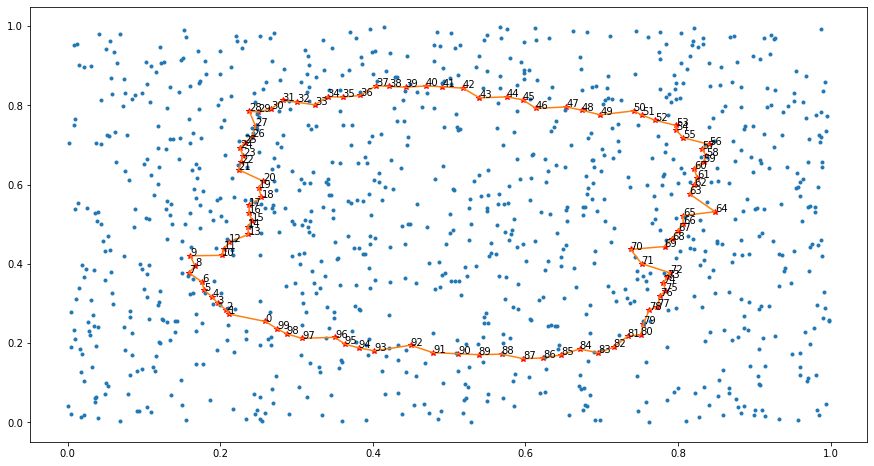

iteration  5


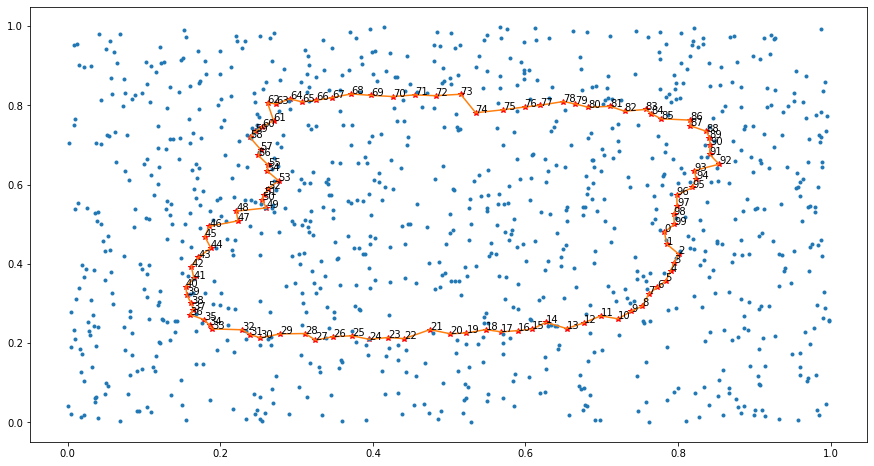

iteration  6


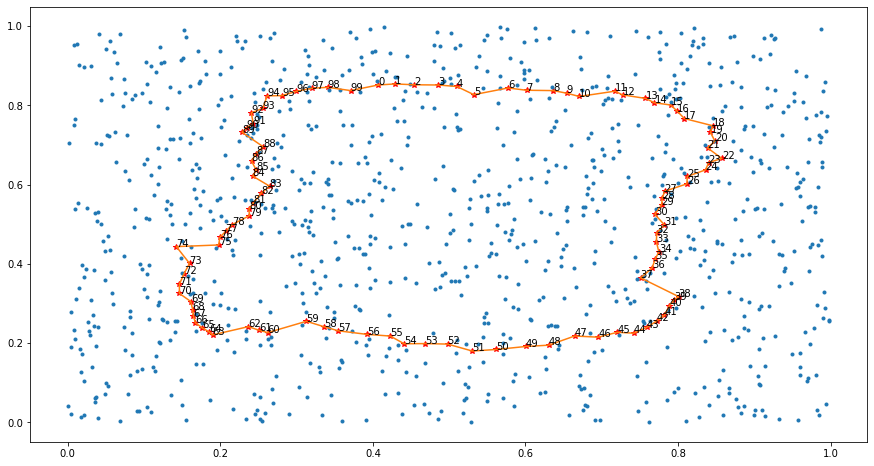

iteration  7


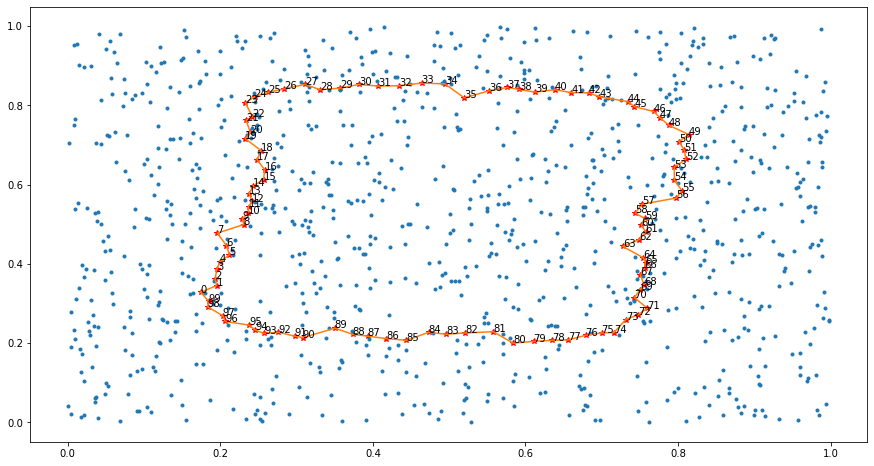

iteration  8


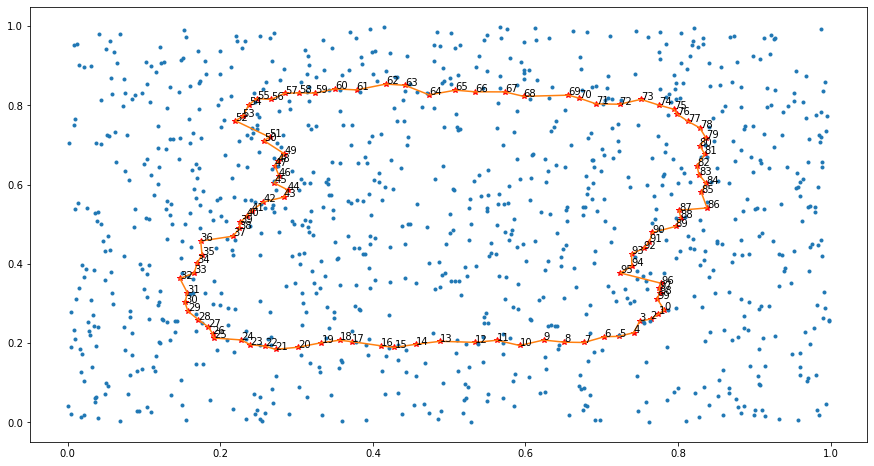

iteration  9


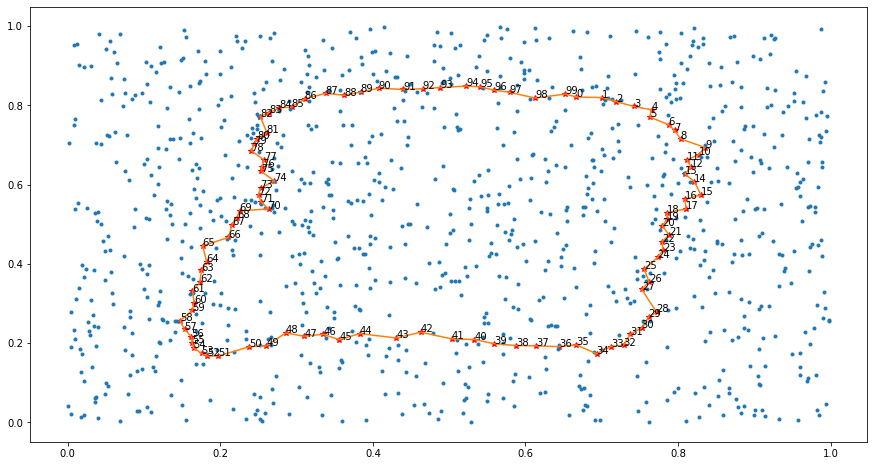

iteration  10


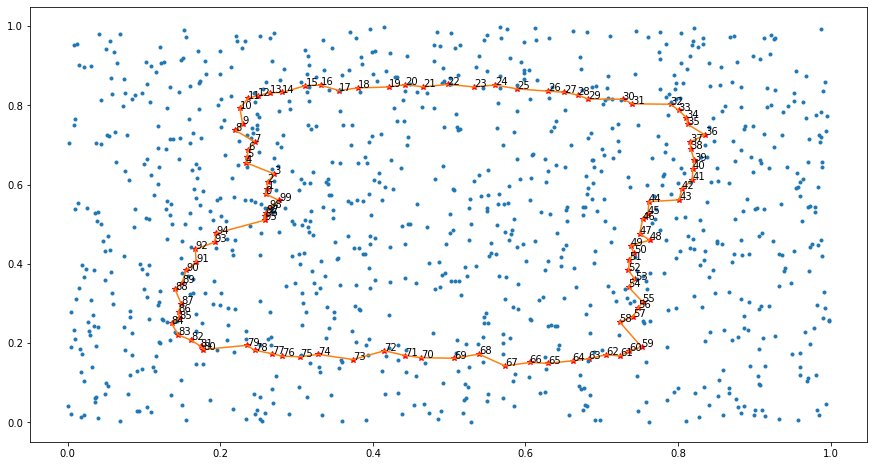

iteration  11


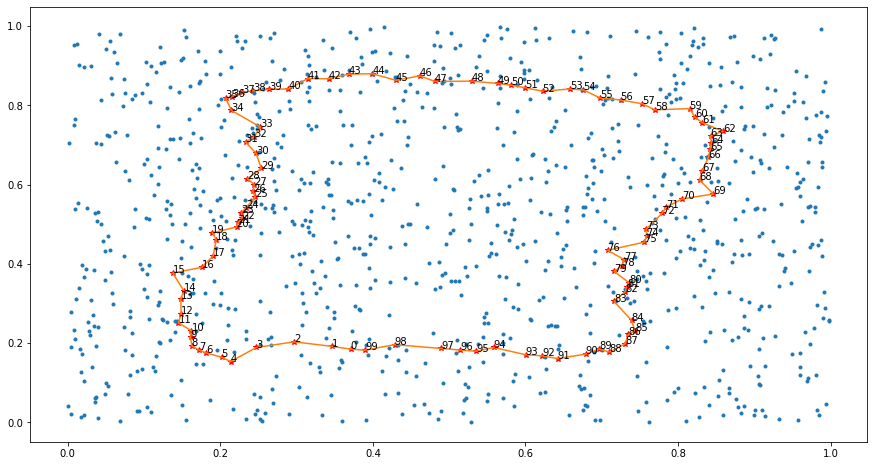

iteration  12


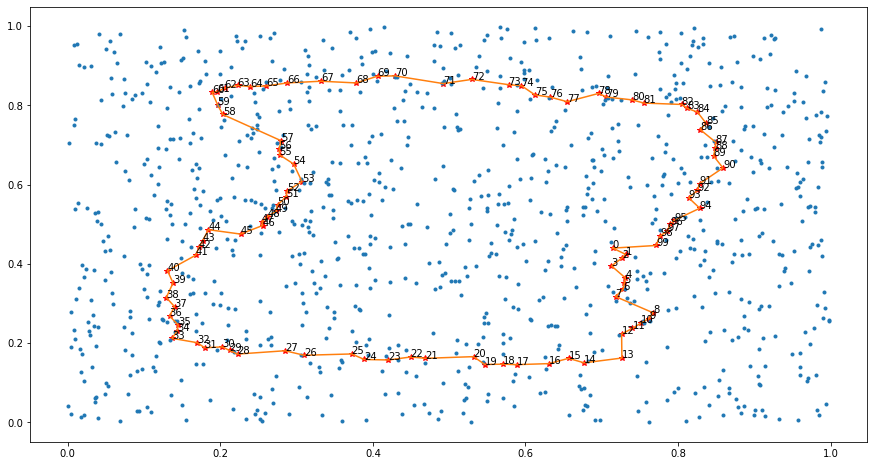

iteration  13


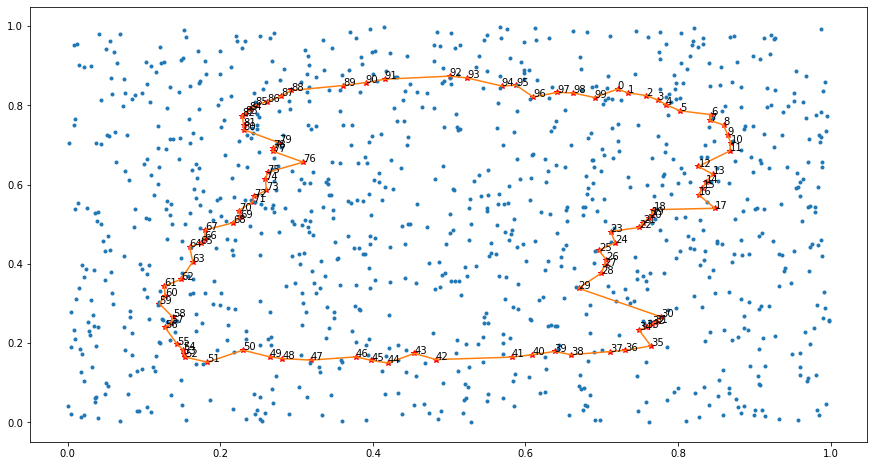

iteration  14


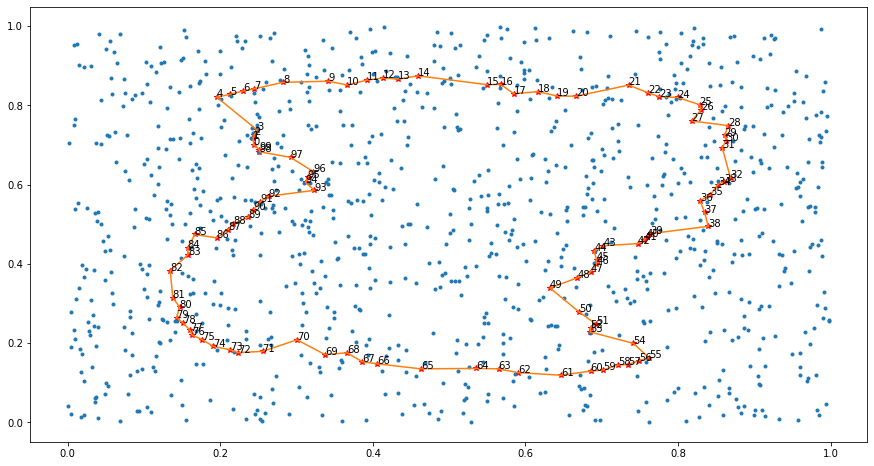

iteration  15


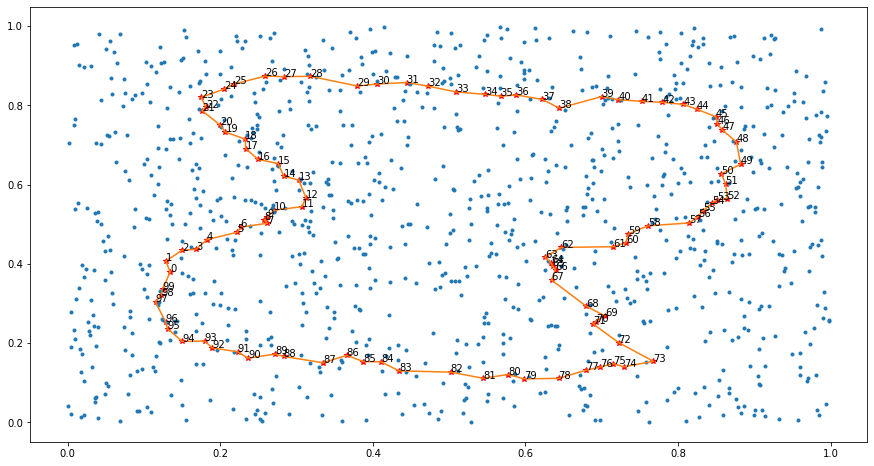

iteration  16


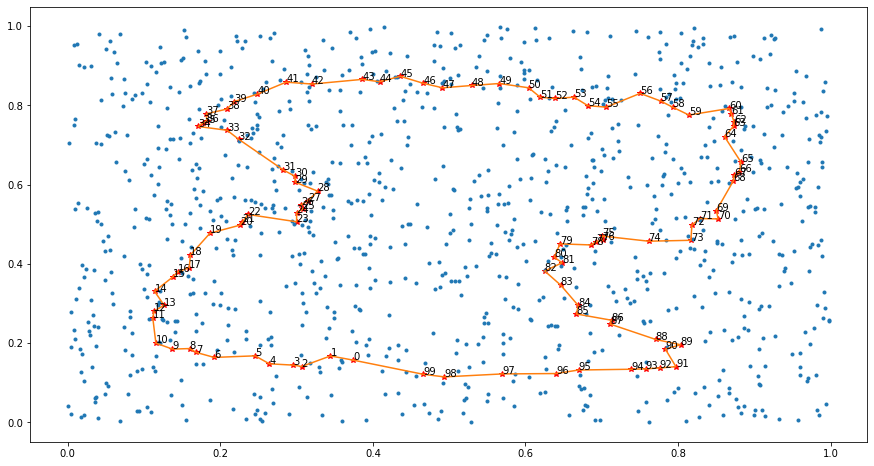

iteration  17


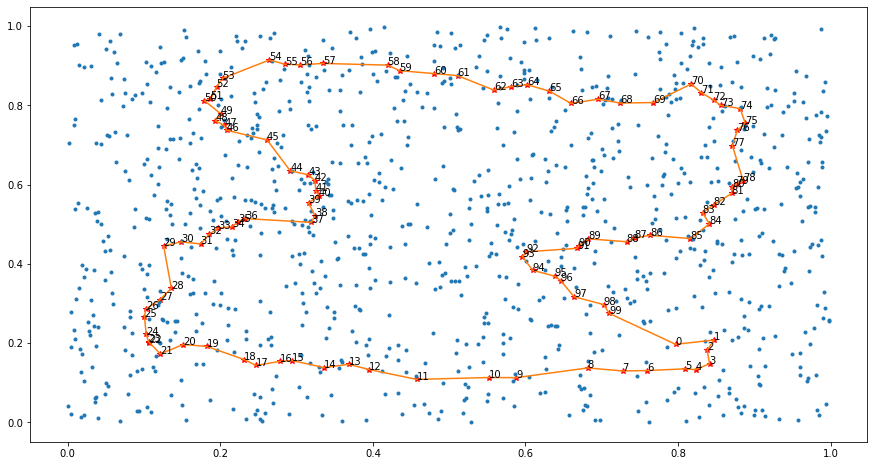

iteration  18


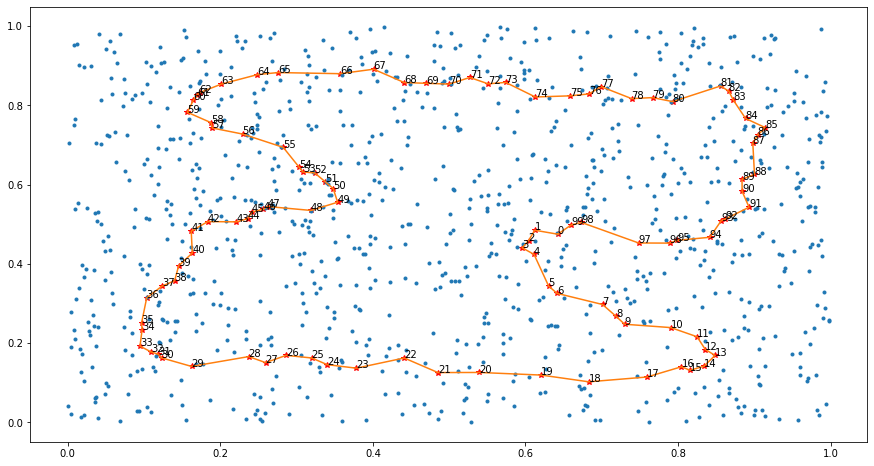

iteration  19


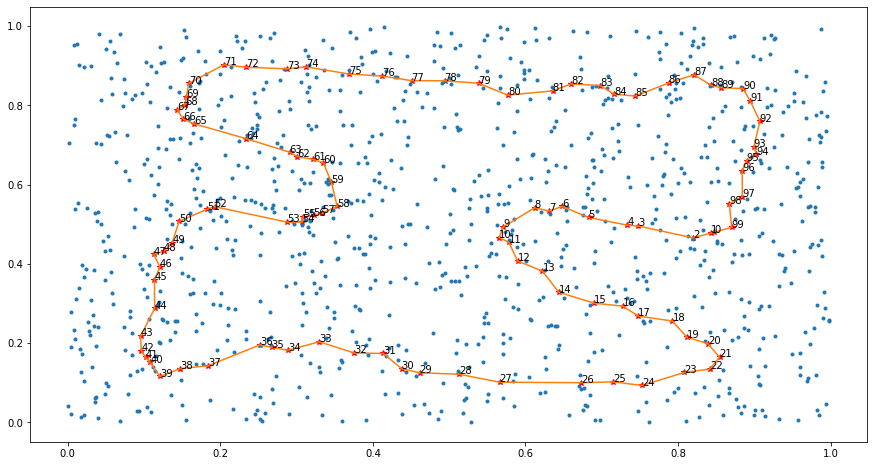

iteration  20


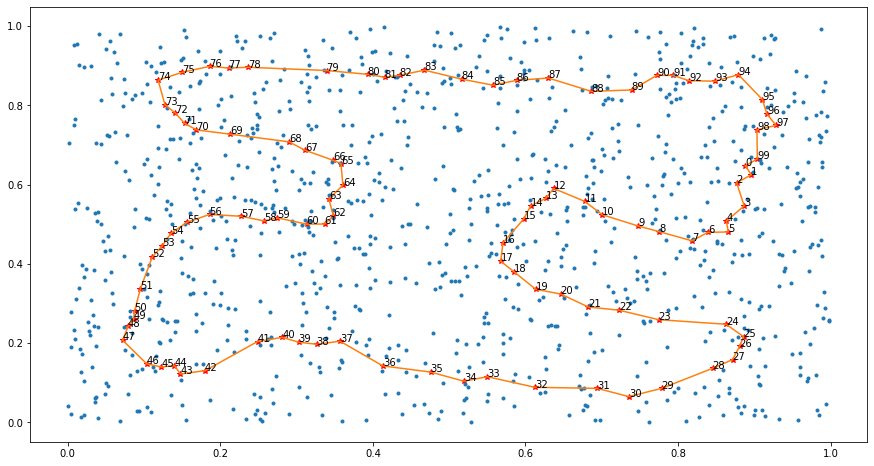

iteration  21


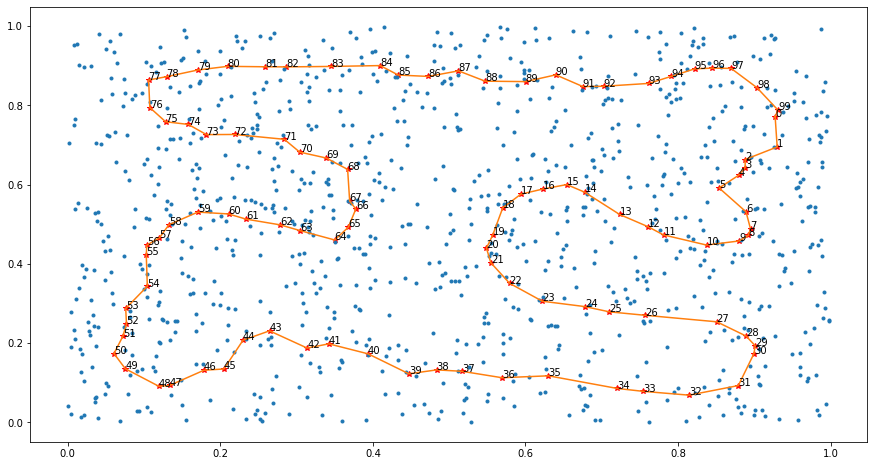

iteration  22


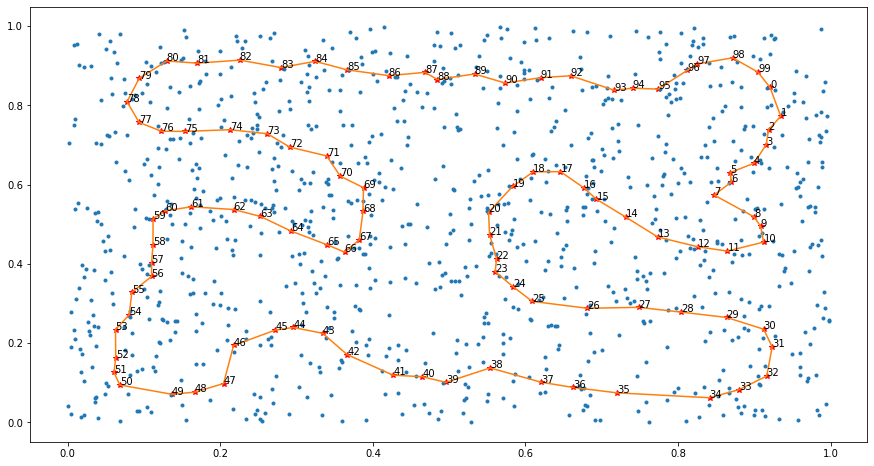

iteration  23


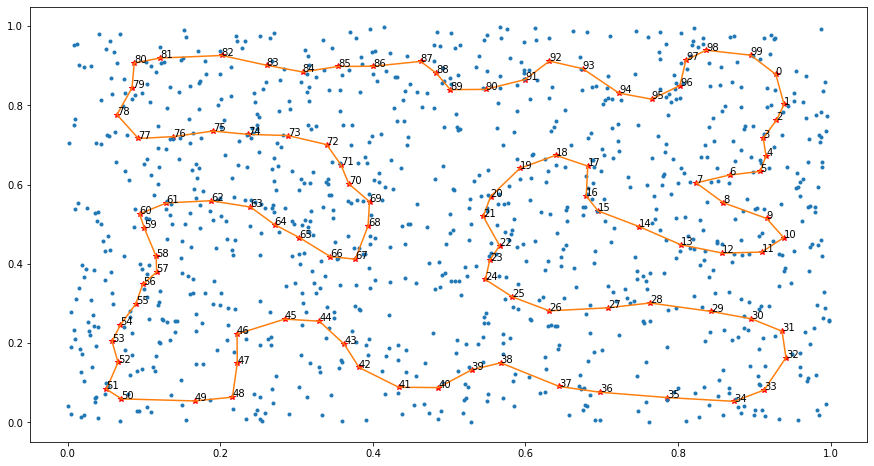

iteration  24


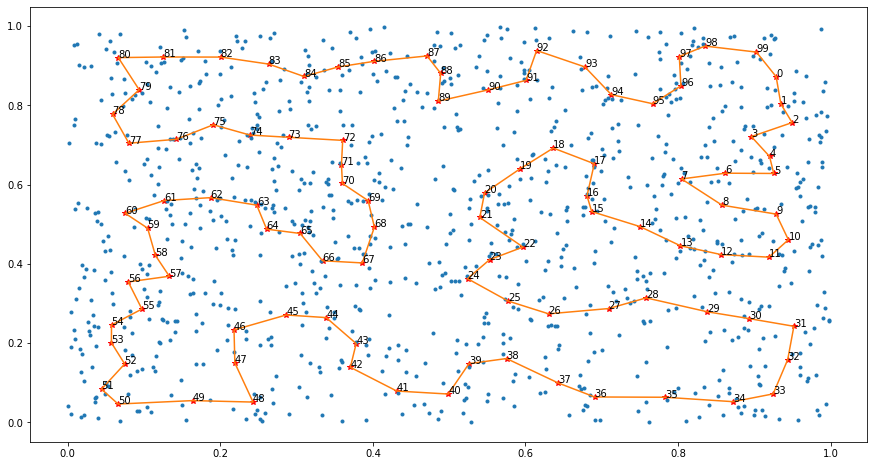

iteration  24


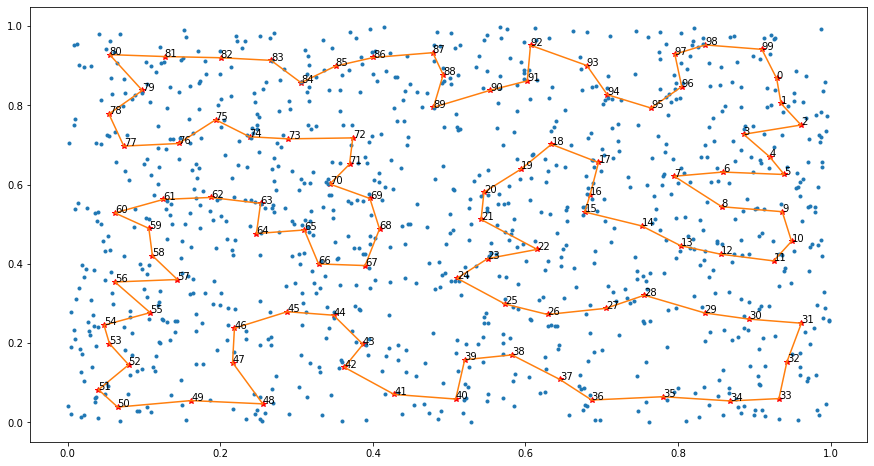

In [7]:
SOM(data5)

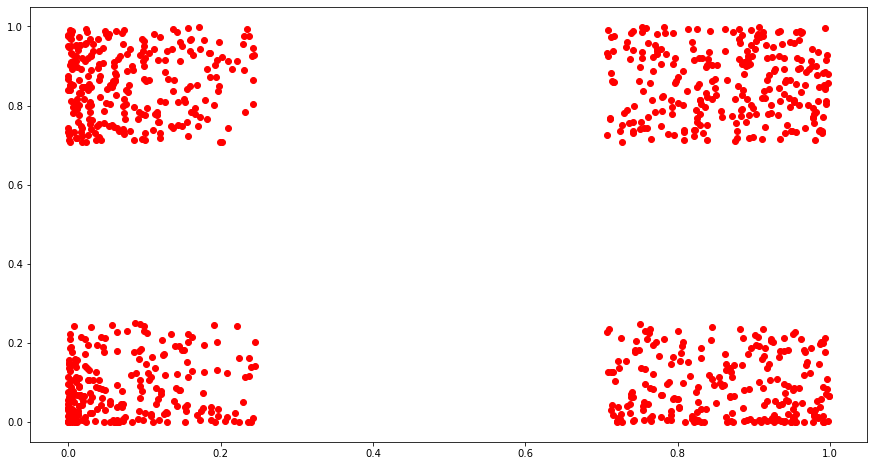

In [8]:
data6=pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randX<=0.5:
        randX=randX**2
    else:
        randX=randX**0.5
    if randY<=0.5:
        randY=randY**2
    else:
        randY=randY**0.5
    data6[i] = [randX, randY]
data6=data6.T
X=[]
Y=[]
for index,row in data6.iterrows():
    X.append(row[0])
    Y.append(row[1])
figure(figsize=(15, 8))
# plt.plot(X,Y)
plt.plot(X,Y,"ro")
plt.show()

iteration  0


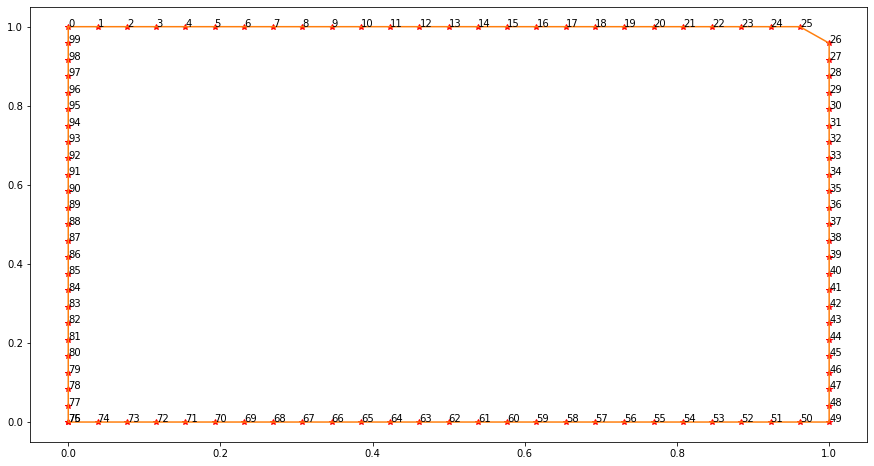

iteration  1


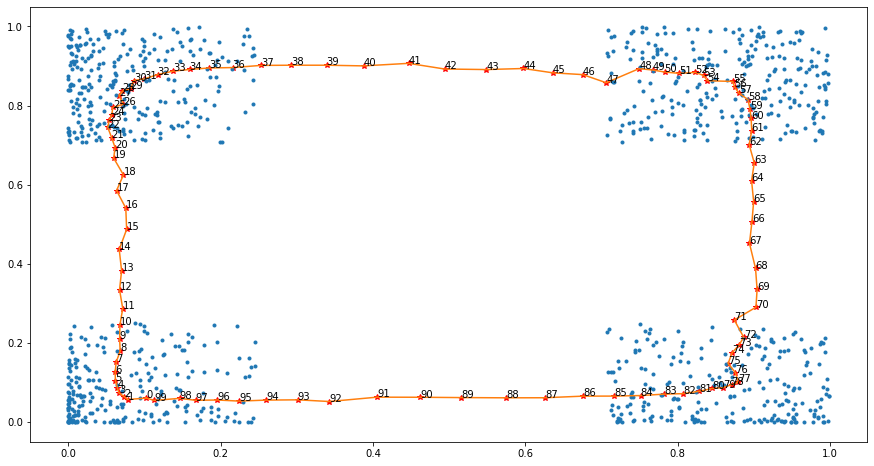

iteration  2


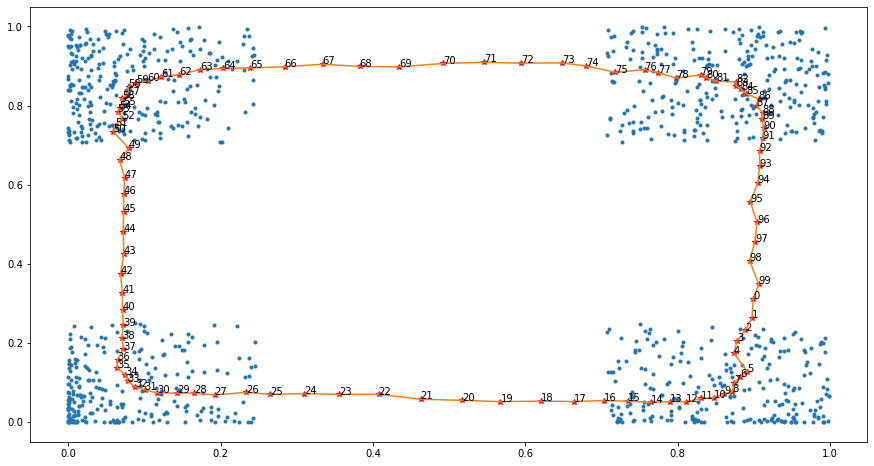

iteration  3


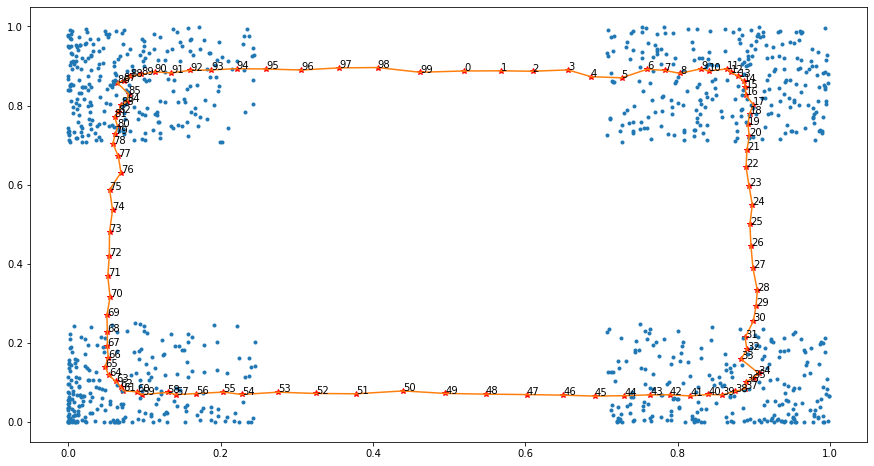

iteration  4


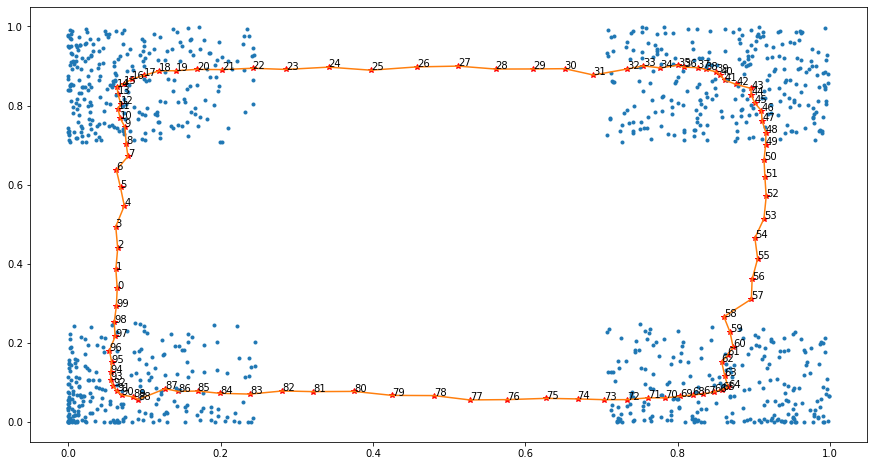

iteration  5


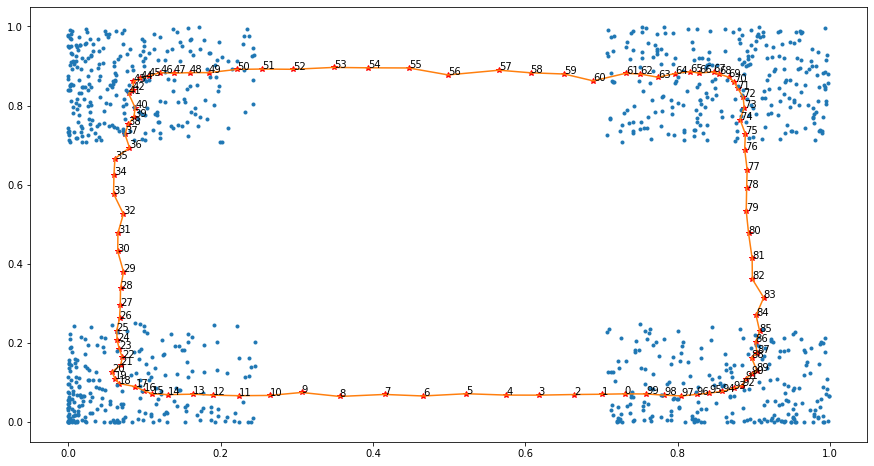

iteration  6


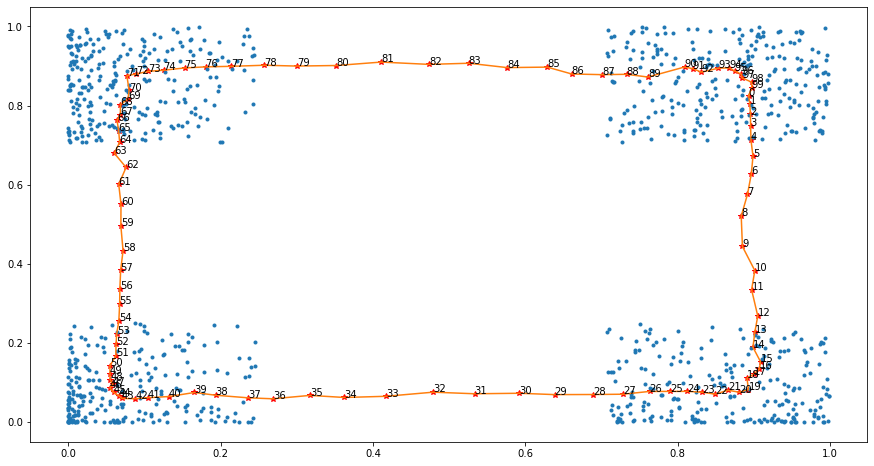

iteration  7


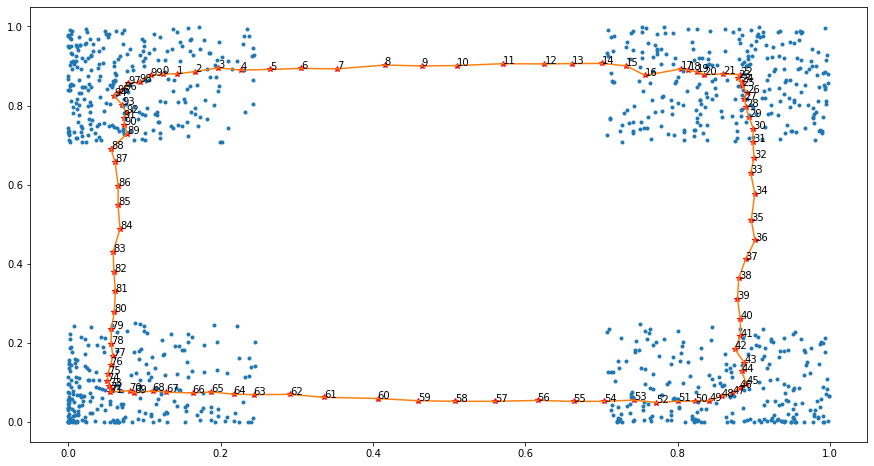

iteration  8


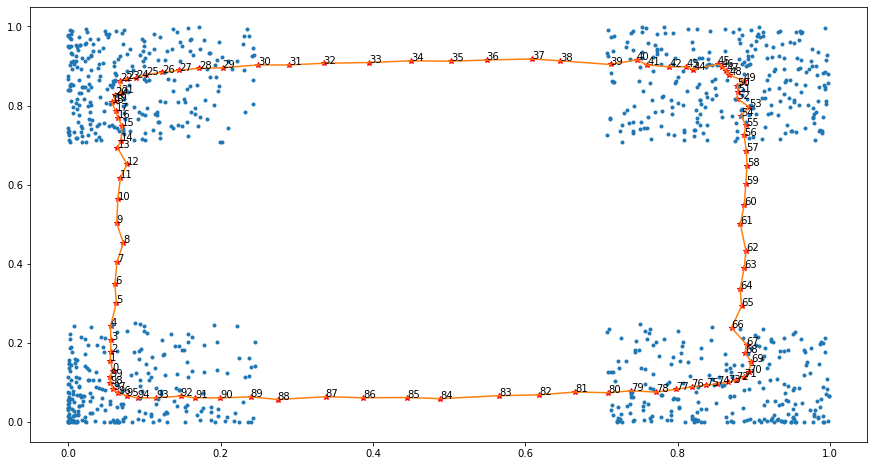

iteration  9


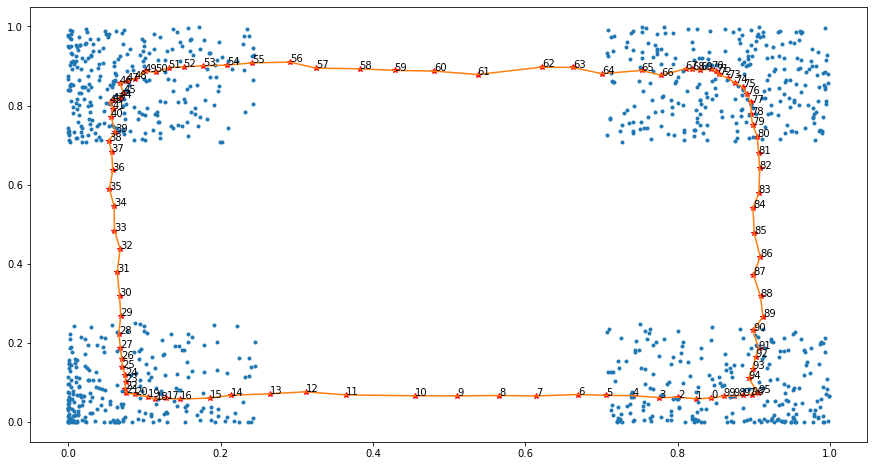

iteration  10


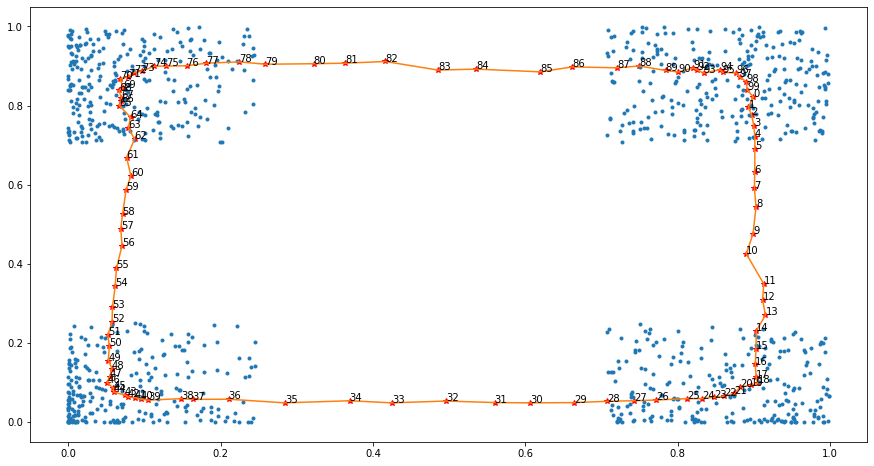

iteration  11


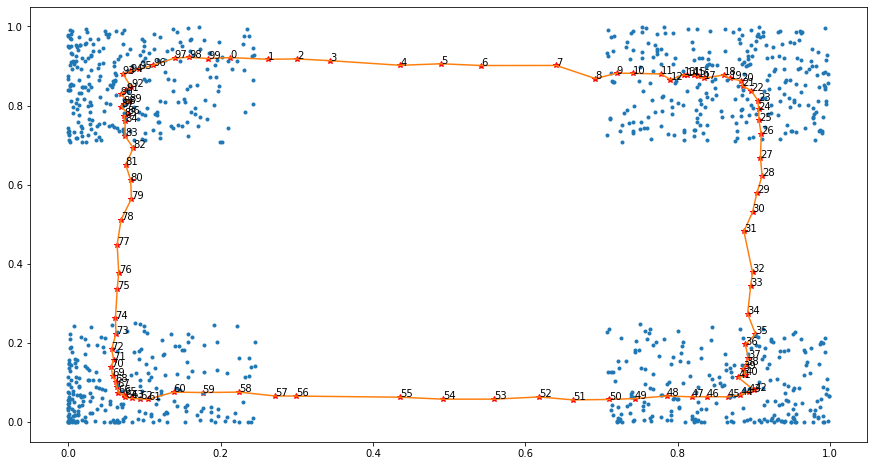

iteration  12


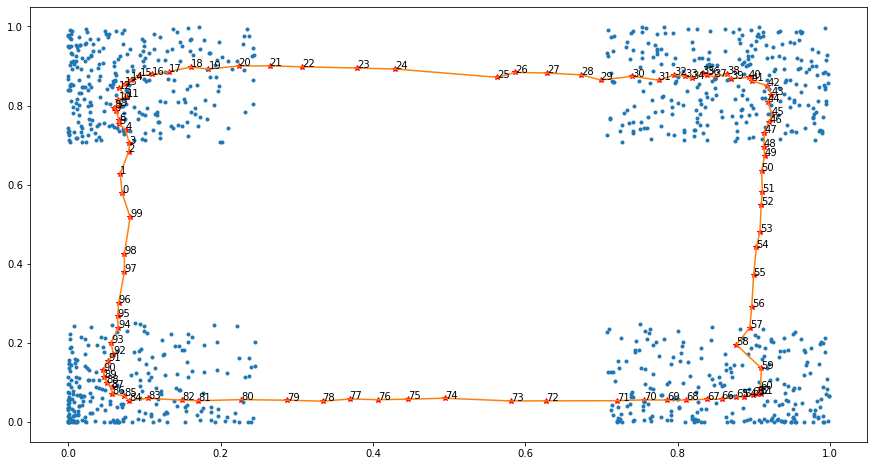

iteration  13


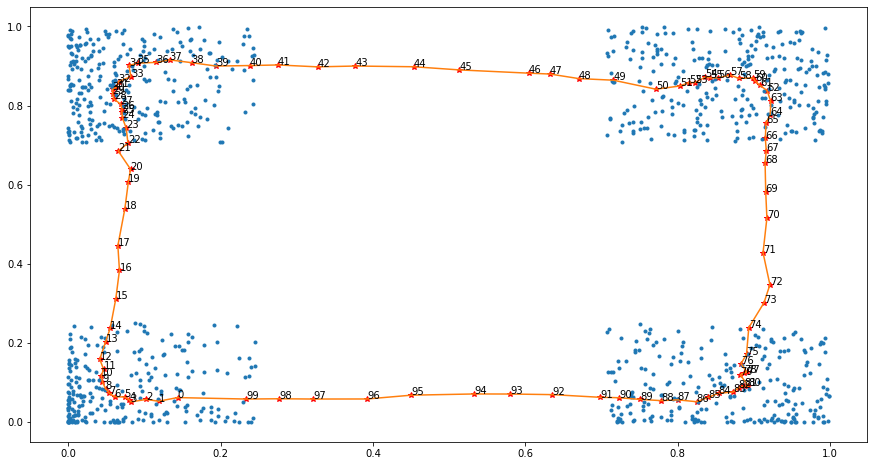

iteration  14


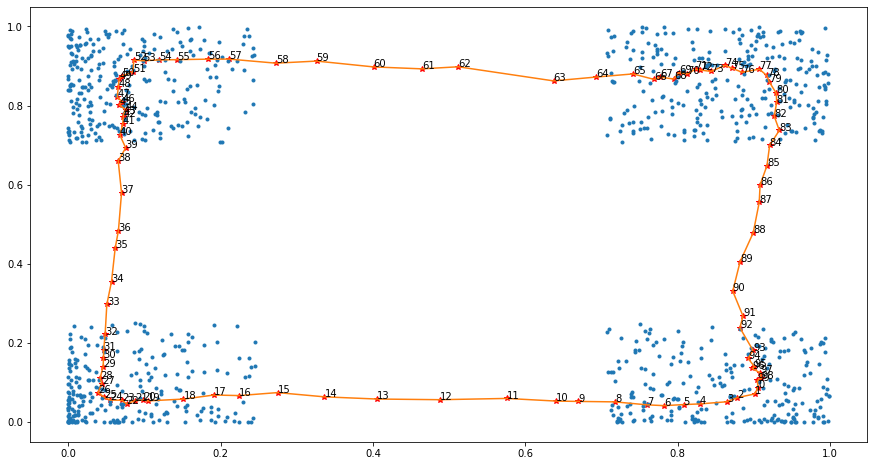

iteration  15


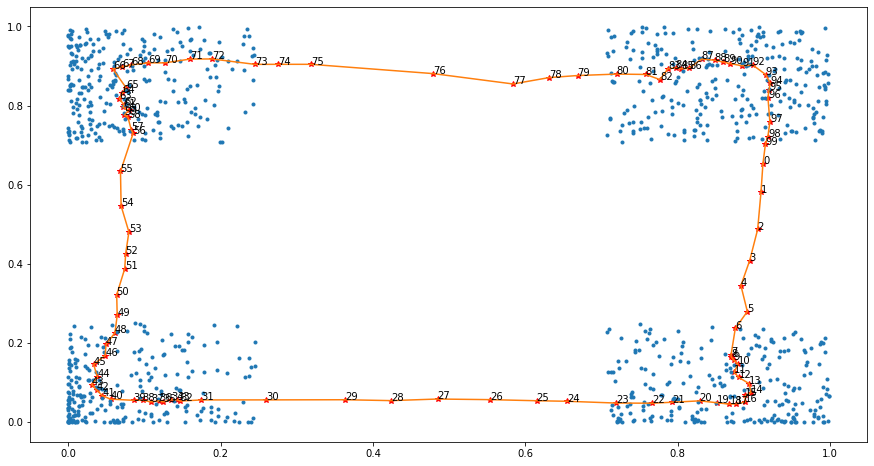

iteration  16


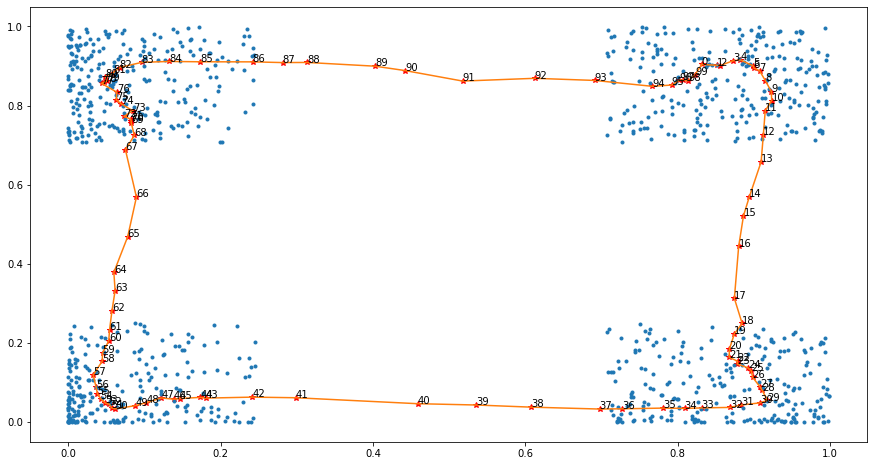

iteration  17


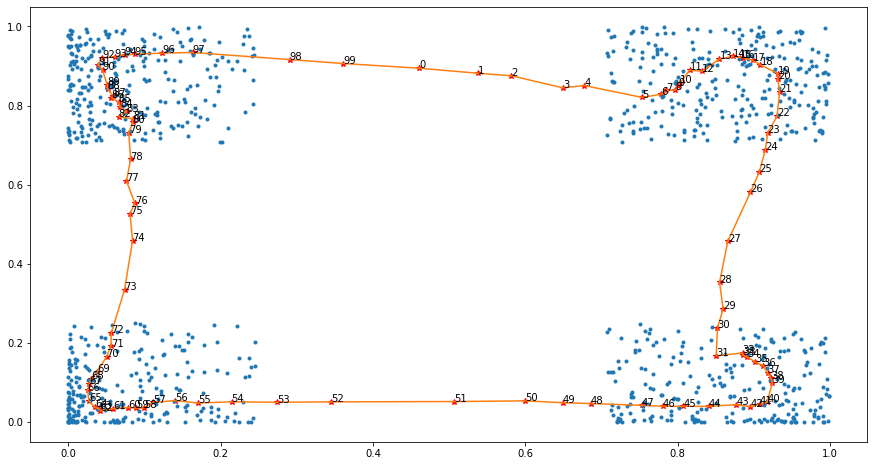

iteration  18


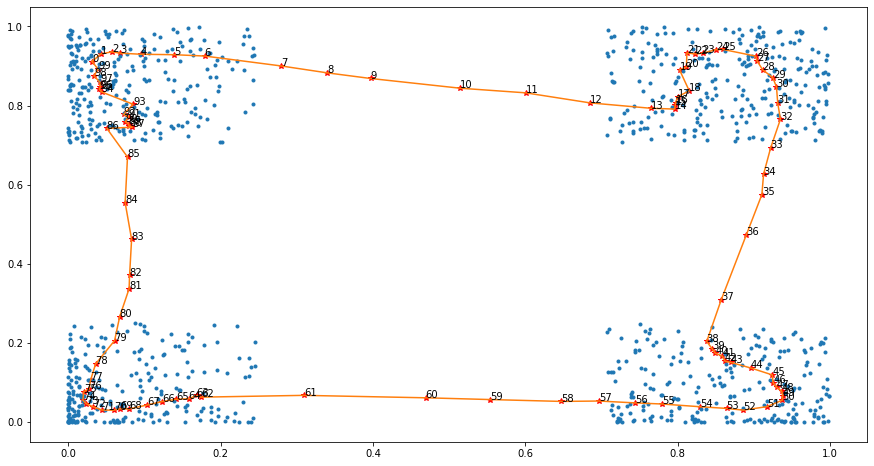

iteration  19


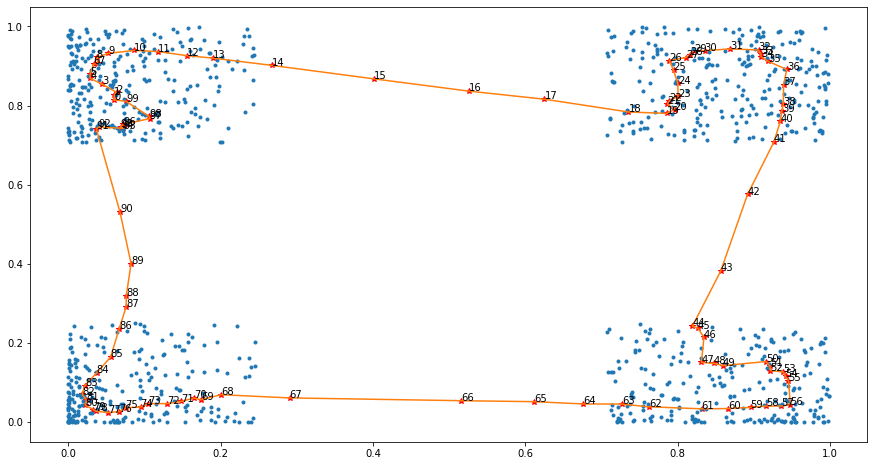

iteration  20


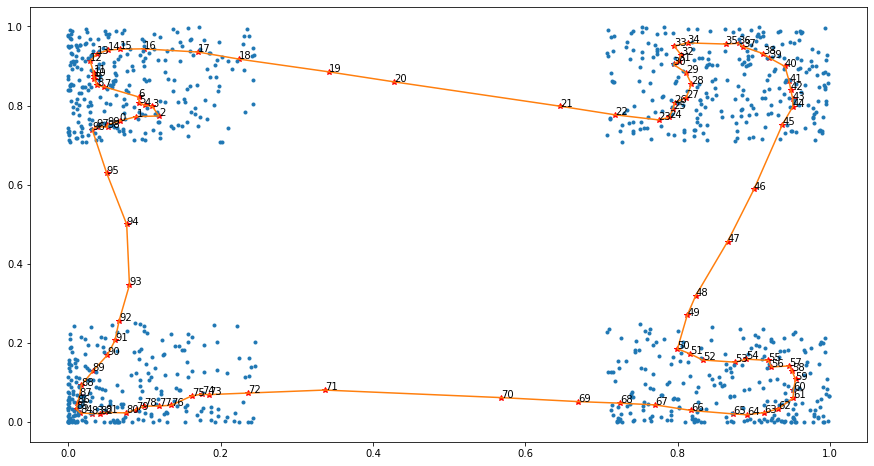

iteration  21


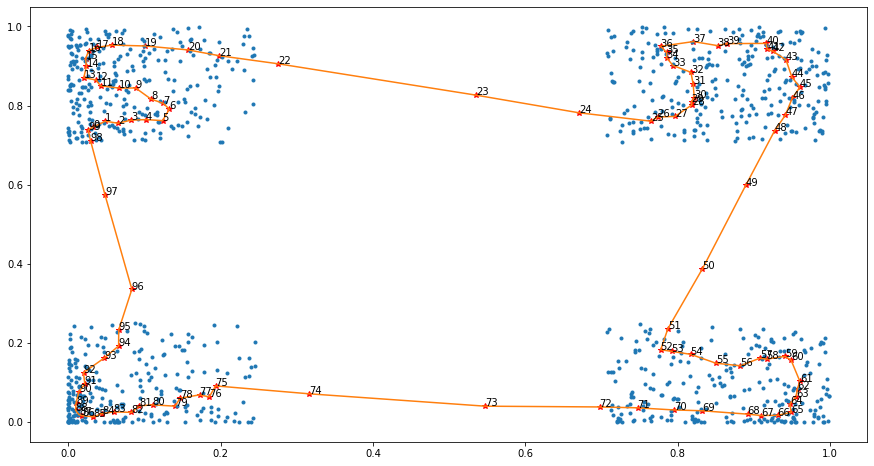

iteration  22


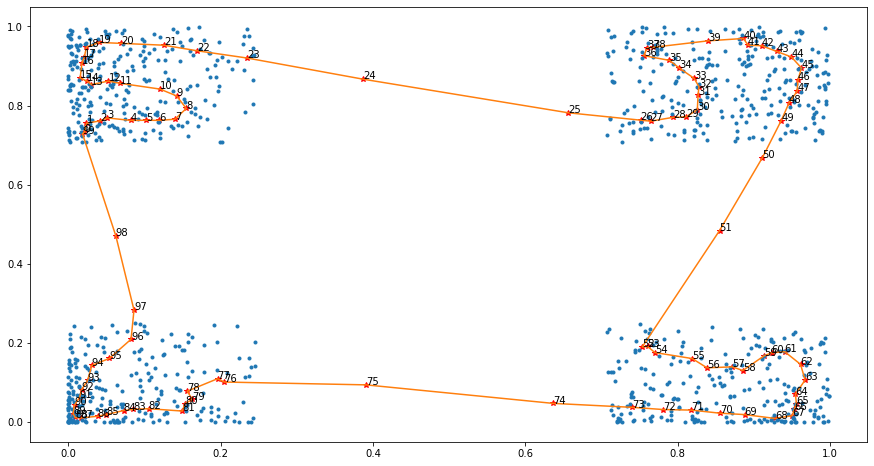

iteration  23


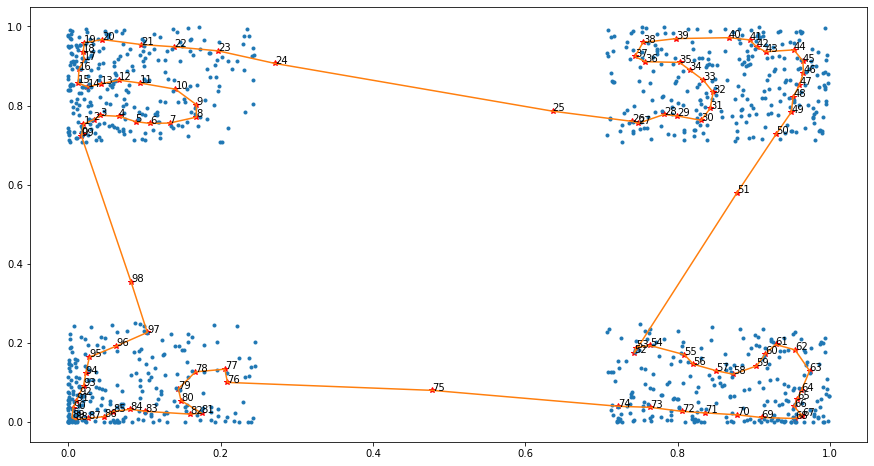

iteration  24


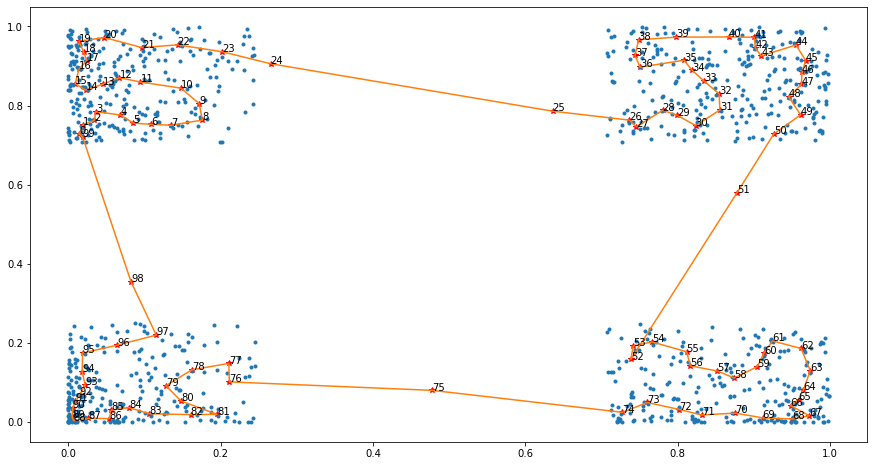

iteration  24


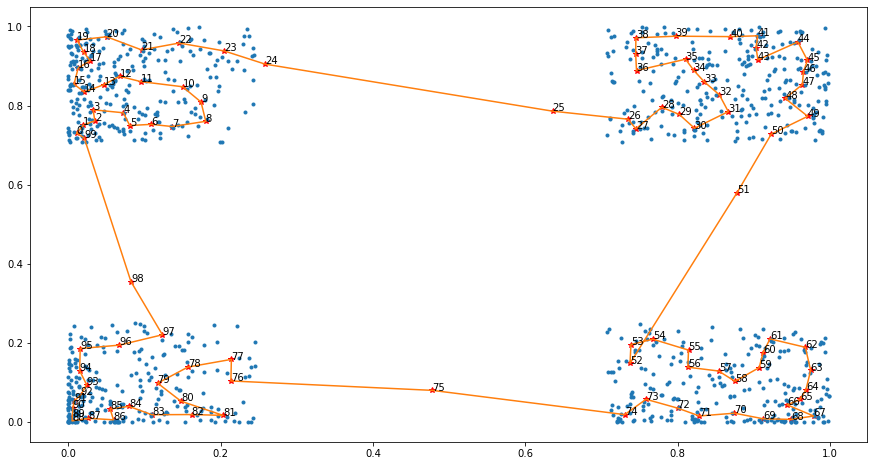

In [9]:
SOM(data6)